## Lab 11: Modeling and Estimation

### Due April 17 at 11:59 PM

In this lab, we will get experience with linear models particularly the parameters in linear models. We want to use gradient descent to determine parameters that fit the model to the data. We will try to understand some of the components of gradient descent such as   

1. Determining an initial guess
1. Updating guesses by calculating a derivative
1. Deciding when to stop updating the guesses
1. Setting a learning rate

We will work with the tips dataset.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** at the top of this notebook.

*List collaborators here*
Madi Perez

In [1]:
# Run this cell

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import minimize

# Packages for configuration

import sys
from IPython.display import Image

In [2]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()

### Loading the Tips Dataset

To begin with, we load the tips dataset from the `seaborn` library.  The tips data contains records of tips, total bill, and information about the person who paid the bill.

In [3]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Question 1: Defining the Model 

In lecture we modeled the percent tip.  In this lab we will instead attempt to model the tip value (in dollars) as a function of the total bill.  As a consequence we define the following mathematical model:

$$\Large
\texttt{Tip} = w^*  \times \texttt{TotalBill}
$$

This follows the similar intuition that tips are some **unknown** percentage of the total bill.  We will then try to estimate the slope of this relationship which corresponds to the percent tip.

Here the parameter $w^*$ represents the true percent tip that we would like to estimate.  


In [4]:
def model(w, total_bill):
    """
    Takes the parameter w and the total bill, and returns the computed tip.
    
    Parameters
    ----------
    w: tip percentage 
    total_bill: total bill value in dollars
    """
    return w * total_bill
    # YOUR CODE HERE
    #raise NotImplementedError()

In [5]:
assert model(1.0, 2.0) == 2.0
assert np.all(model(3.0, np.array([4.0, 5.0])) == 3.0 * np.array([4.0, 5.0]))

### Loss Functions

In class we covered a range of different loss functions.  In this lab we will implement the squared loss and the absolute loss functions.  
Suppose for a given total bill $x$, we observe a tip value of $y$ and our model predicts a tip value $\hat{y}$ by:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = w x
$$ 
then any of the following might be appropriate **loss functions**

1. **Squared Loss**:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$
1. **Absolute Loss** :
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$


In this question, you are going to define functions for **squared loss** and **absolute loss**. 

### Question 2a: Implement the squared loss function
We want to write a function to calculate square loss

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$

Again try to avoid using loops. Instead take advantage of `numpy` to calculate absolute value.

In [6]:
def squared_loss(y_obs, y_hat):
    """
    Calculate the squared loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the squared loss for each prediction
    """
    return (y_obs - y_hat) ** 2
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    

In [7]:
assert squared_loss(2, 1) == 1
assert squared_loss(2, 0) == 4 
assert squared_loss(5, 1) == 16
assert np.sum((squared_loss(np.array([5, 6]), np.array([1, 1])) - np.array([16, 25]))**2) == 0.0

### Question 2b: Plotting Squared Loss

Suppose you observe a bill of $\$28$ with a tip $\$3$. (Does this tip look reasonable?)

Transform this information in our model, we have a $y=3.00$ and $x=28.00$. Now suppose we pick an initial range of $w$'s (tip percent in this case) for you. Use the `model` and `squared_loss` function defined above to plot the loss for a range of $w$ values:

In [8]:
y = 3.00
x = 28.00
ws = np.linspace(0, 0.3, 200) # A range of w values

In the cell below, replacing 0.0 with the square loss between observed tip `y` and predicted value `w * x` where `w` ranges over the entries of `ws`. You can take a look at Question 2c for more information.

In [9]:
loss = np.array([squared_loss(y, w*x) for w in ws])  # replace 0.0 with the appropriate expression

# YOUR CODE HERE
#raise NotImplementedError()

In [10]:
assert all([np.issubdtype(entry, np.number) for entry in loss])

To test your loss calculation above, run the cell below, and it should produce this picture:

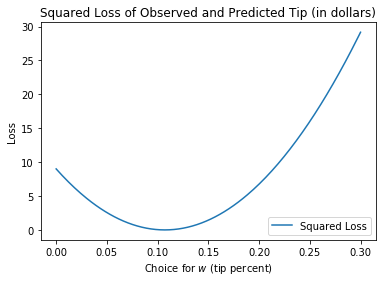

In [11]:
Image("squared_loss_my_plot.png")

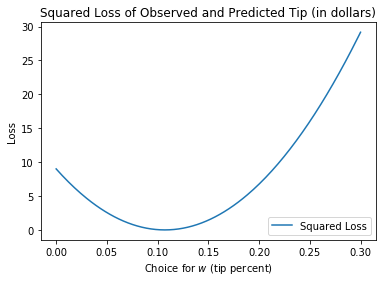

In [12]:
plt.plot(ws, loss, label="Squared Loss")
plt.title("Squared Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $w$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4);

### Question 2c: Implement the absolute loss 

Let us repeat Question 2a for the absolute loss. 

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

Again try to avoid using loops. Instead take advantage of `numpy` to calculate absolute value.

In [13]:
def abs_loss(y_obs, y_hat):
    """
    Calculate the absolute loss of the observed data and predicted data.
    
    Parameters
    ------------
    y_obs: an array of observed values
    y_hat: an array of predicted values
    
    Returns
    ------------
    An array of loss values corresponding to the absolute loss for each prediction
    """
    return abs(y_obs - y_hat)
    # YOUR CODE HERE
    #raise NotImplementedError()

In [14]:
assert abs_loss(2, 1) == 1
assert abs_loss(-2, 1) == 3
assert abs_loss(1, -3) == 4 
assert np.linalg.norm(abs_loss(np.array([1,2]), np.array([-3,3])) - np.array([4, 1]), ord=1) == 0.0

Below is the plot of the absolute loss.  If you implemented things correctly it should look like:




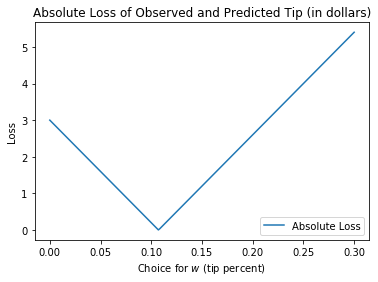

In [15]:
Image("absolute_loss_my_plot.png")

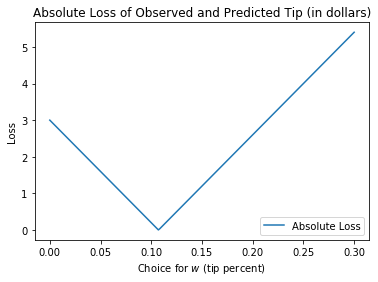

In [16]:
y = 3.00
x = 28.00
ws = np.linspace(0, 0.3, 200) 

loss = np.array([abs_loss(y, model(w, x)) for w in ws])

plt.plot(ws, loss, label="Absolute Loss")
plt.title("Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $w$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("absolute_loss_my_plot.png",  bbox_inches = 'tight')


### Question 2d: Plotting **Average Loss** for our Data
Remember we define our model to be:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = w x
$$ 
Now, we can extend the above loss functions to an entire dataset by taking the average. We have the datasets

$$\large
\{x_1, \ldots, y_n\}, \;  \{y_1, \ldots, y_n\}
$$

where $x_i$ is the total bill and $y_i$ is the tip dollar amount.

We can define the average loss over the dataset as:

$$\large
\begin{align}
L\left(\theta, \{x_1, \ldots, y_n\}, \;  \{y_1, \ldots, y_n\} \right)  &= \frac{1}{n} \sum_{i=1}^n L(\theta x_i, y_i) \\ &= \frac{1}{n} \sum_{i=1}^n L(\hat{y_i}, y_i)
\end{align}
$$

where $\hat{y_i} = w x_i$ is the model evaluated using the parameters $w$ on the bill amount $x_i$.

In the cell below, replace 0.0 with the average loss for the different values of $w$. Use should use `squared_loss` from Question 2a and `abs_loss` from Question 2c. 

In [17]:
ws = np.linspace(0, 0.3, 200) # A range of w values
y = data['tip']
x = data['total_bill']

avg_squared_loss = np.array([squared_loss(y, w*x).mean() for w in ws])
avg_absolute_loss = np.array([abs_loss(y, w*x).mean() for w in ws])

# YOUR CODE HERE
#raise NotImplementedError()

To test your loss calculations, run the cell below. If your code was correct, the following plot should look like the following chart. Note that your colors might be different.

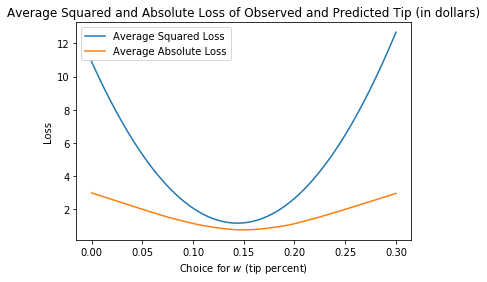

In [18]:
Image("average_loss_my_plot.png")

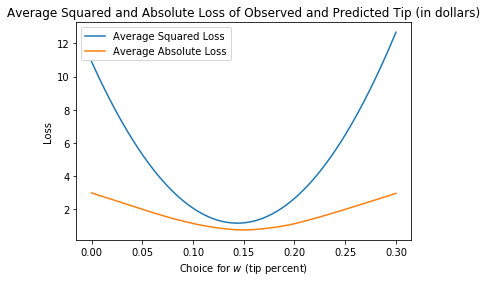

In [19]:
plt.plot(ws, avg_squared_loss, label = "Average Squared Loss")
plt.plot(ws, avg_absolute_loss, label = "Average Absolute Loss")
plt.title("Average Squared and Absolute Loss of Observed and Predicted Tip (in dollars)")
plt.xlabel(r"Choice for $w$ (tip percent)")
plt.ylabel(r"Loss")
plt.legend();

**Based on the plot above, approximately what is the optimal value of w you would choose for this model?**

In [20]:
approximate_value = .14
# YOUR CODE HERE
#raise NotImplementedError()

In [21]:
# TEST 

assert 0.05 < approximate_value < 0.25

### 3. Gradient Descent for Squared Loss

Let's try gradient descent: a a procedure for guess-and-check to iteratively find an approximate solution. 

### Question 3a. Calculating the derivative 

Write a function `dt_square` that computes the gradient of the average square loss with respect to $w$. 

In [50]:
def dt_square(x, y, w):
    ans = 2*(y - (w * x)) * (-x)
    return np.mean(ans)
    # YOUR CODE HERE
    #raise NotImplementedError()

### Question 3b. Implementing Gradient Descent

Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in an array for $\textbf{x}$ (`x`), an array for $\textbf{y}$ (`y`), and an initial value for $w$ (`w`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate that is the same at every time step.

- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `w` several times
- Recall that the gradient descent update function follows the form:
$$\large
\boldsymbol w^{(t+1)} \leftarrow \boldsymbol w^{(t)} - \alpha \left(\frac{d}{d \boldsymbol w} \mathbf{L}(\boldsymbol w^{(t)}) \right)
$$

In [51]:
def grad_desc(x, y, dt, initial_guess, maximum_iterations, learning_rate):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    x -- the collection of x values
    y -- the collection of y values
    dt -- derivative function
    initial_guess -- the initial guess for the parameter
    maximum_iterations -- the max number of iterations
    learning_rate -- the learning rate (also called the step size)
    
    Return:
    w -- the optimal value of w after num_iter of gradient descent
    """
     
    w = initial_guess
    for m in range(maximum_iterations):
        grad = dt(x,y,w)
        new_theta = w - learning_rate * grad
        w = new_theta
        
    # YOUR CODE HERE
    #raise NotImplementedError()
    return w

### Question 3c : Running Gradient Descent

Compute the parameter $\hat{w}$ that minmizes the average square loss. Try using 

 - initial guess $0$
 - 20 iterations 
 - learning rate 0.001
 


In [52]:
initial_guess = 0
maximum_iterations = 20
learning_rate = .001
dt = dt_square

y = data['tip']
x = data['total_bill']

w_hat = grad_desc(x,y,dt,initial_guess,maximum_iterations, learning_rate)
w_hat
# YOUR CODE HERE
#raise NotImplementedError()

0.14373189527721666

In [53]:
# TEST 

assert 0.1 < w_hat < 0.2

### BEGIN HIDDEN TEST 
assert np.abs(w_hat - 0.143) < 0.1
### END HIDDEN TEST

### QUESTION  3d. 

Repeat 3a, 3b, 3c for absolute loss.  Compute the parameter $\hat{w}$ that minmizes the average absolute loss. How does your answer compare to average square loss?

Note that the absolute value function has rate of change
$$
\frac{d}{dx} |x| = \begin{cases} 1 & \text{ if x >0} \\ -1 & \text{ if x < 0} \end{cases}
$$
So we can compute the derivative of the absolute loss from `np.sign`.

In [30]:
def dt_absolute(x, y, w):
    t = np.sign(model(w,x)-y)
    return np.mean(t*x)

In [54]:
initial_guess = 0
maximum_iterations = 20
learning_rate = .001
dt = dt_absolute

y = data['tip']
x = data['total_bill']

w_hat = 

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# TEST 

assert 0.1 < w_hat < 0.2

### BEGIN HIDDEN TEST 
assert np.abs(w_hat - 0.149) < 0.1
### END HIDDEN TEST